This is a dataset related to how much money a person can get from a mortgage on his or her home. This dataset includes the following features:
* Gender: Gender of the borrower (including two values 'F' and 'M')
* Age: Age of the customer applying for a loan (including positive integer values)
* Income (USD): Customer's income in USD (value is a positive number)
* Income Stability: The level of customer's income stability (including three values of Low and High)
* Property Age: Life expectancy of the house in days (including positive integer values)
* Property Location: Location of the house (including 'Rural', 'Urban', and 'Semi-Urban')
* Property Price: The value of the house in USD (including positive real values)
* Loan Sanction Amount (USD): Amount that customers can borrow in USD (target value)


In [ ]:
# mount data from google drive to colab
from google.colab import drive
drive.mount('/content/drive')

#import library
import pandas as pd # pandas
import numpy as np # numpy
import time


Mounted at /content/drive


# Prepare and Analyze Data

1. Load Dataset
2. Analyze Dataset
3. Preprocess data (type, null, missing, ...)
4. Feature Engineering

## Load Dataset

In [ ]:
# read data using Pandas DataFrame
def read_dataset(path):
    # Todo: read_csv from a path and return a DataFrame
    df = pd.read_csv(path)
    display(df.head())
    display(df.describe())
    return df

In [ ]:
path = "/content/drive/MyDrive/final_house_loan.csv" # Path to your file

df = read_dataset(path)
#ToDo: Show histogram of dataframe

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


## Data Analysis

<Axes: >

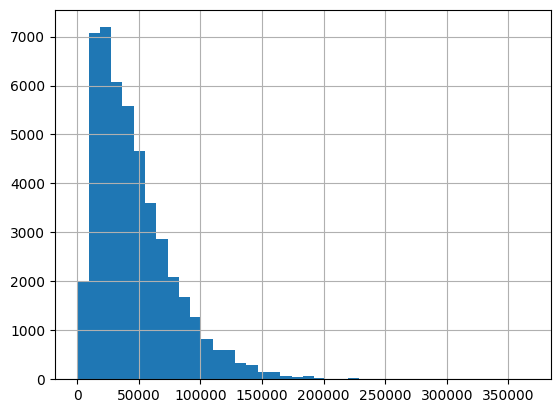

In [ ]:
df["Loan Sanction Amount (USD)"].hist(bins=40)

<Axes: xlabel='Loan Sanction Amount (USD)', ylabel='Count'>

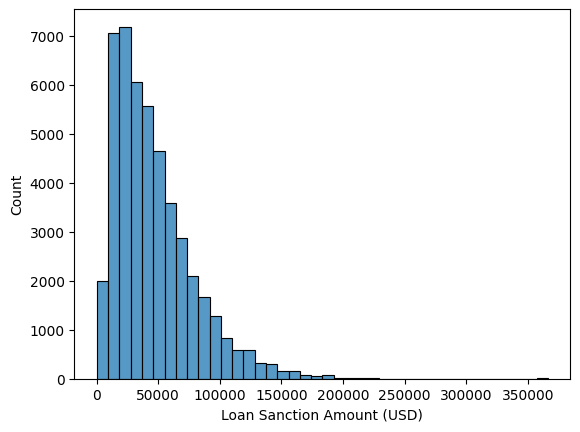

In [ ]:
import seaborn as sns
sns.histplot(data=df,x="Loan Sanction Amount (USD)",bins=40)

In [ ]:
df.isnull().sum()

Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

## Preprocessing

In [ ]:
def preprocessing_data(df):
    df=df.dropna()
    return df

In [ ]:
df = preprocessing_data(df.copy())

In [ ]:
df.isnull().sum()

Gender                        0
Age                           0
Income (USD)                  0
Income Stability              0
Property Age                  0
Property Location             0
Property Price                0
Loan Sanction Amount (USD)    0
dtype: int64

## Feature Engineering

In [ ]:
#method 1 :
start_time=time.time()
normalized_data=df.copy()

normalized_data["Gender"]=normalized_data["Gender"].apply(lambda x:0 if x=="M" else 1)
normalized_data["Income Stability"]=normalized_data["Income Stability"].apply(lambda x:0 if x=="Low" else 1)
normalized_data["Property Location"]=normalized_data["Property Location"].apply(lambda x:0 if x=="Rural" else 1 if x=="Urban" else 2 if x=="Semi-Urban" else 3)
normalized_data

display(normalized_data.head())
display(normalized_data.corr())
print("Running time : ",time.time()-start_time)

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,1,19,1641.25,1,1651.25,3,59641.82,21026.420753
1,1,29,1989.71,1,1990.71,3,179858.51,60595.183366
2,1,37,1849.91,1,1856.91,3,117297.62,39181.648002
3,1,65,2735.18,1,2747.18,3,354417.72,128497.710865
4,1,62,4741.78,1,4740.78,3,82049.80,39386.919336


,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,1.000000,-0.044026,NaN,-0.044025,NaN,-0.003243,-0.000071
Income (USD),NaN,-0.044026,1.000000,NaN,0.999986,NaN,0.358025,0.392810
Income Stability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Property Age,NaN,-0.044025,0.999986,NaN,1.000000,NaN,0.358025,0.392806
Property Location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Property Price,NaN,-0.003243,0.358025,NaN,0.358025,NaN,1.000000,0.994402
Loan Sanction Amount (USD),NaN,-0.000071,0.392810,NaN,0.392806,NaN,0.994402,1.000000


Running time :  0.1265101432800293


In [ ]:
# method 2
start_time=time.time()

normalized_data=pd.get_dummies(df.loc[:,["Gender","Income Stability","Property Location"]])
normalized_data=pd.concat([normalized_data,df.loc[:,["Age","Property Age","Property Price"]]],axis=1)
normalized_data=pd.concat([normalized_data,df.loc[:,["Loan Sanction Amount (USD)"]]],axis=1)

display(normalized_data.head())
display(normalized_data.corr())
print("Running : ",time.time()-start_time)

,Gender,Income Stability,Property Location,Age,Property Age,Property Price,Loan Sanction Amount (USD)
0,0,1,0,19,1651.25,59641.82,21026.420753
1,1,1,2,29,1990.71,179858.51,60595.183366
2,0,1,0,37,1856.91,117297.62,39181.648002
3,1,0,0,65,2747.18,354417.72,128497.710865
4,0,0,2,62,4740.78,82049.80,39386.919336


,Gender,Income Stability,Property Location,Age,Property Age,Property Price,Loan Sanction Amount (USD)
Gender,1.000000,-0.019205,0.009217,0.007577,-0.002707,0.005953,0.003408
Income Stability,-0.019205,1.000000,-0.001843,-0.453475,0.081175,0.005282,-0.070684
Property Location,0.009217,-0.001843,1.000000,-0.007598,-0.000653,-0.000879,-0.002024
Age,0.007577,-0.453475,-0.007598,1.000000,-0.044025,-0.003243,-0.000071
Property Age,-0.002707,0.081175,-0.000653,-0.044025,1.000000,0.358025,0.392806
Property Price,0.005953,0.005282,-0.000879,-0.003243,0.358025,1.000000,0.994402
Loan Sanction Amount (USD),0.003408,-0.070684,-0.002024,-0.000071,0.392806,0.994402,1.000000


Running :  0.06786513328552246


In [ ]:
def normalize_data(df):
    start_time=time.time() # Todo: normalize data into numerical data
    normalized_data=df.copy()
    normalized_data["Gender"]=normalized_data["Gender"].astype("category").cat.codes
    normalized_data["Income Stability"]=normalized_data["Income Stability"].astype("category").cat.codes
    normalized_data["Property Location"]=normalized_data["Property Location"].astype("category").cat.codes

    display(normalized_data.head())
    display(normalized_data.corr())
    print("Running time : ",time.time()-start_time)
    return normalized_data

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,0,19,1641.25,2,1651.25,1,59641.82,21026.420753
1,1,29,1989.71,2,1990.71,3,179858.51,60595.183366
2,0,37,1849.91,2,1856.91,1,117297.62,39181.648002
3,1,65,2735.18,1,2747.18,1,354417.72,128497.710865
4,0,62,4741.78,1,4740.78,3,82049.80,39386.919336


,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
Gender,1.000000,0.007577,-0.002641,-0.019205,-0.002707,0.009217,0.005953,0.003408
Age,0.007577,1.000000,-0.044026,-0.453475,-0.044025,-0.007598,-0.003243,-0.000071
Income (USD),-0.002641,-0.044026,1.000000,0.081128,0.999986,-0.000620,0.358025,0.392810
Income Stability,-0.019205,-0.453475,0.081128,1.000000,0.081175,-0.001843,0.005282,-0.070684
Property Age,-0.002707,-0.044025,0.999986,0.081175,1.000000,-0.000653,0.358025,0.392806
Property Location,0.009217,-0.007598,-0.000620,-0.001843,-0.000653,1.000000,-0.000879,-0.002024
Property Price,0.005953,-0.003243,0.358025,0.005282,0.358025,-0.000879,1.000000,0.994402
Loan Sanction Amount (USD),0.003408,-0.000071,0.392810,-0.070684,0.392806,-0.002024,0.994402,1.000000


Running time :  0.07175064086914062


<Axes: >

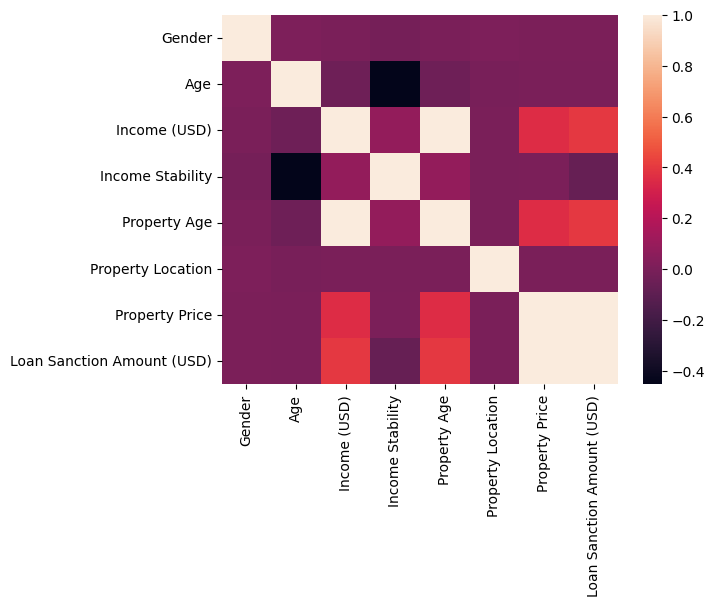

In [ ]:
# Heatmap
import seaborn as sns

df = normalize_data(df.copy())
sns.heatmap(df.corr()) # Show heatmap after normalized data

# Apply machine learning model

## Train-test split

In [ ]:
def prepare_X_y(df):
    # Split data into X and y. Return two dataframes
    columns=df.columns.tolist()
    columns.remove("Loan Sanction Amount (USD)")
    X = df[columns] # Todo: Select features
    y = df["Loan Sanction Amount (USD)"] # Todo: Select label
    return X, y

X, y = prepare_X_y(df)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


def split_train_test(X, y, train_size=0.7):
    trainX, testX ,trainY, testY =train_test_split(X, y,train_size=TRAIN_SIZE,random_state=2024) # Use sklearn train_test_split to split X and y into 2 sets: train set and test set. With train_size is the proportion of train_set and fix the random_state with a number
    print('Training:' + str(trainX.shape))
    print('Test:' + str(testX.shape))

    return trainX, testX ,trainY, testY

In [ ]:
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = split_train_test(X, y, train_size=TRAIN_SIZE)

Training:(33084, 7)
Test:(14179, 7)


## Basic Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression


def build_linear_model(X, y):
    model = LinearRegression(fit_intercept=True) # Todo: use sklearn model and config your parameters
    model.fit(trainX,trainY) # Todo: fit your model with X, y

    return model

model = build_linear_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  167.43270496301048
mean absolute error of linear model on test set  139.01990832964455
[-2.59707237e+02 -7.89989911e+01  5.64472023e-01 -1.11055485e+04
  4.60600591e-01 -5.93323524e+01  3.36312299e-01]

23026.10775254147


In [ ]:
from sklearn.linear_model import Lasso


def build_lasso_model(X, y,alpha=1.0):
    model =Lasso(alpha=alpha) # Todo: use sklearn model and config your parameters
    model.fit(X,y) # Todo: fit your model with X, y

    return model

model = build_lasso_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  168.04860213849648
mean absolute error of linear model on test set  139.6431585099013
[-2.55665001e+02 -7.88687366e+01  8.52100601e-01 -1.10896640e+04
  1.72791754e-01 -5.78151633e+01  3.36313286e-01]

22985.829755422794


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.878e+10, tolerance: 3.464e+09
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.linear_model import Ridge

def build_ridge_model(X, y,alpha=1.0):
    model =Ridge(alpha=alpha) # Todo: use sklearn model and config your parameters
    model.fit(X,y) # Todo: fit your model with X, y

    return model

model = build_ridge_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  167.63254348556796
mean absolute error of linear model on test set  139.21750037480442
[-2.59629201e+02 -7.89574753e+01  5.66303433e-01 -1.11003571e+04
  4.58702791e-01 -5.93157373e+01  3.36312696e-01]

23014.573687482298


In [ ]:
from sklearn.linear_model import ElasticNet

def build_elastic_model(X, y, alpha=0.001, l1_ratio=0.5):
    model = ElasticNet(alpha=alpha,l1_ratio=l1_ratio) # Todo: use sklearn model and config your parameters
    model.fit(X,y) # Todo: fit your model with X, y

    return model

model = build_elastic_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  171.77623871176928
mean absolute error of linear model on test set  143.24825505811393
[-2.58488463e+02 -7.83167393e+01  8.53038577e-01 -1.10201844e+04
  1.70956946e-01 -5.90852500e+01  3.36318778e-01]

22836.500949489262


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.402e+10, tolerance: 3.464e+09
  model = cd_fast.enet_coordinate_descent(


## Polynomial Transform

When the data feature does not conform to a linear function, a linear regression cannot be applied directly to the original data. Then, there are many possibilities that the data feature conforms to the polynomial function. Scikit-Learn supports converting data features to polynomials through ``PolynomialFeatures``.

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

The formula above uses the transformation of the value $x$ from one dimension to the other, with the aim of being able to use linear regression to find complex relationships between $x$ and $y$.

In [ ]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y):
    poly_model = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression()) # use make_pipeline to apply PolynomialFeatures and a Regression model train your dataset
    poly_model.fit(X, y)

    return poly_model
poly_model=build_pipeline(trainX,trainY)
# Compare on training dataset
poly_pred = poly_model.predict(trainX)
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

poly_pred = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=testY))

mean absolute error of linear model (with poly transform) on train set  167.40651502927227
mean absolute error of linear model (with poly transform) on test set  137.12443621736355
